In [1]:
df.flu = read.csv(file = "Fluorescence.csv")
head(df.flu)

Calcium,ProteinProp
-10.145390,0.1451642
-9.977984,0.2237115
-9.351250,0.2198288
-9.101001,0.3342694
-9.013766,0.3785262
-8.940437,0.4093691


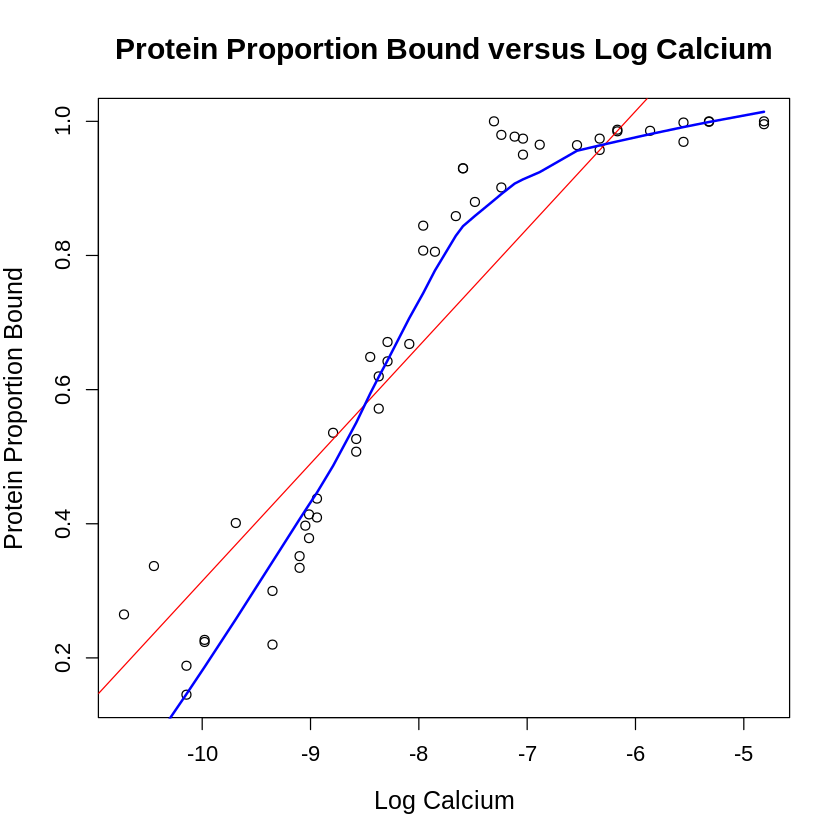

In [46]:
flu.lm = lm(ProteinProp ~ Calcium, data=df.flu)
plot(x=df.flu$Calcium, y=df.flu$ProteinProp, 
     main="Protein Proportion Bound versus Log Calcium", 
     ylab="Protein Proportion Bound", xlab="Log Calcium", 
     cex.main = 1.5, cex.lab = 1.25, cex.axis = 1.1)
abline(flu.lm, col="red") 
lines(lowess(df.flu$Calcium, df.flu$ProteinProp), col='blue', lwd=2)

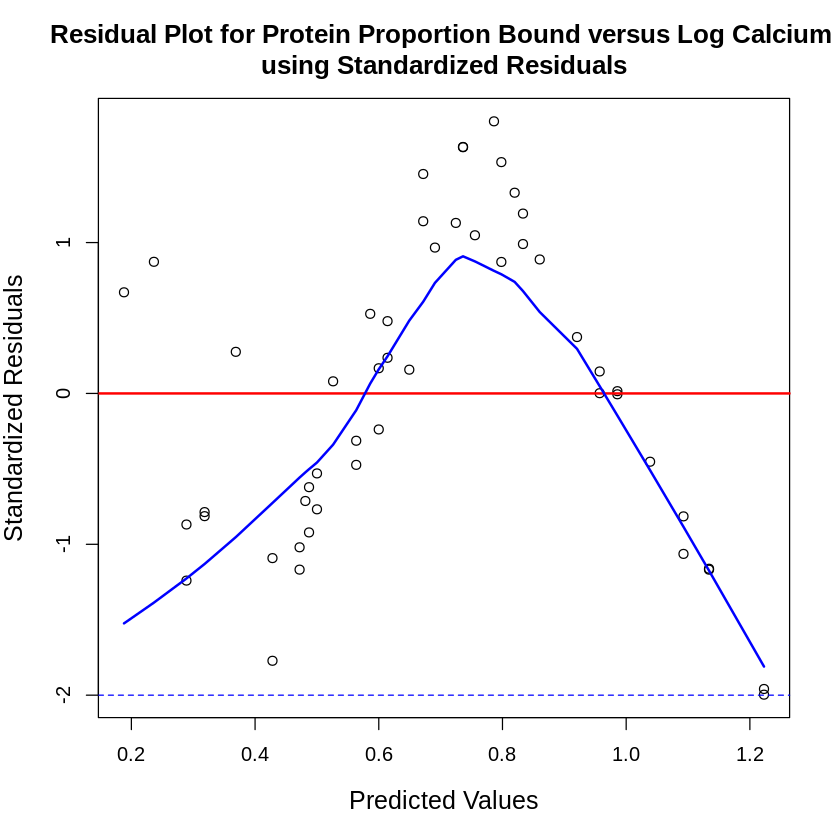

In [47]:
flu.rstand=rstandard(flu.lm) #obtain residuals
flu.pred = predict(flu.lm)  #obtain predicted

plot(flu.pred, flu.rstand, 
     main="Residual Plot for Protein Proportion Bound versus Log Calcium 
using Standardized Residuals",
      xlab="Predicted Values", 
     ylab="Standardized Residuals", cex.main = 1.3,
     cex.lab = 1.25)
abline(h=0, col="red", lwd=2)
abline(h = 2 , col="blue", lty=2)
abline(h = -2, col="blue", lty=2)
lines(lowess(flu.pred, flu.rstand), col='blue', lwd=2)

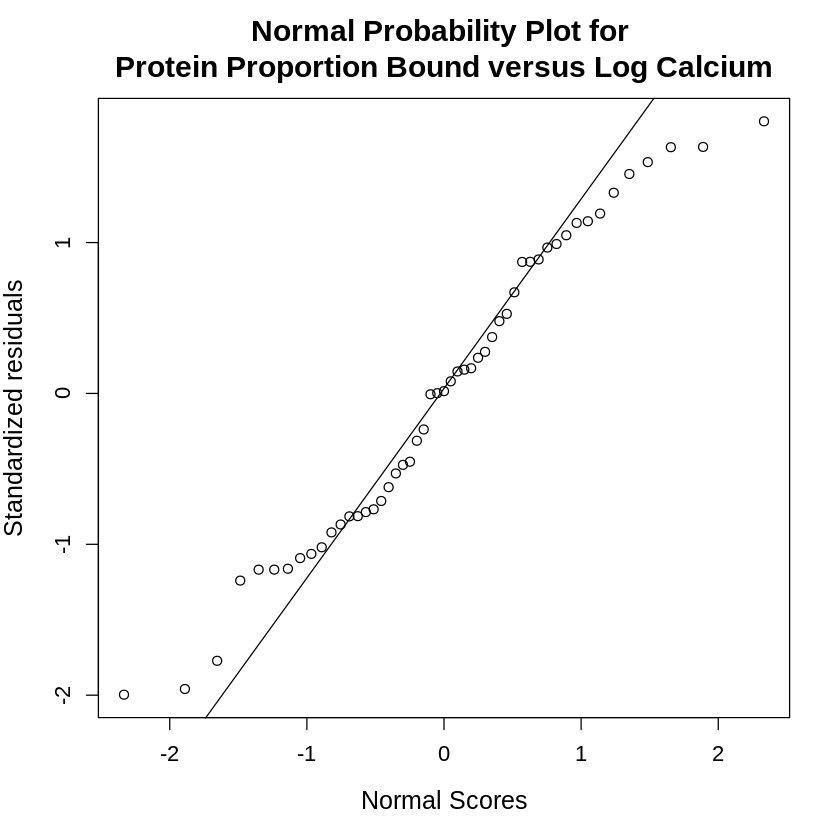

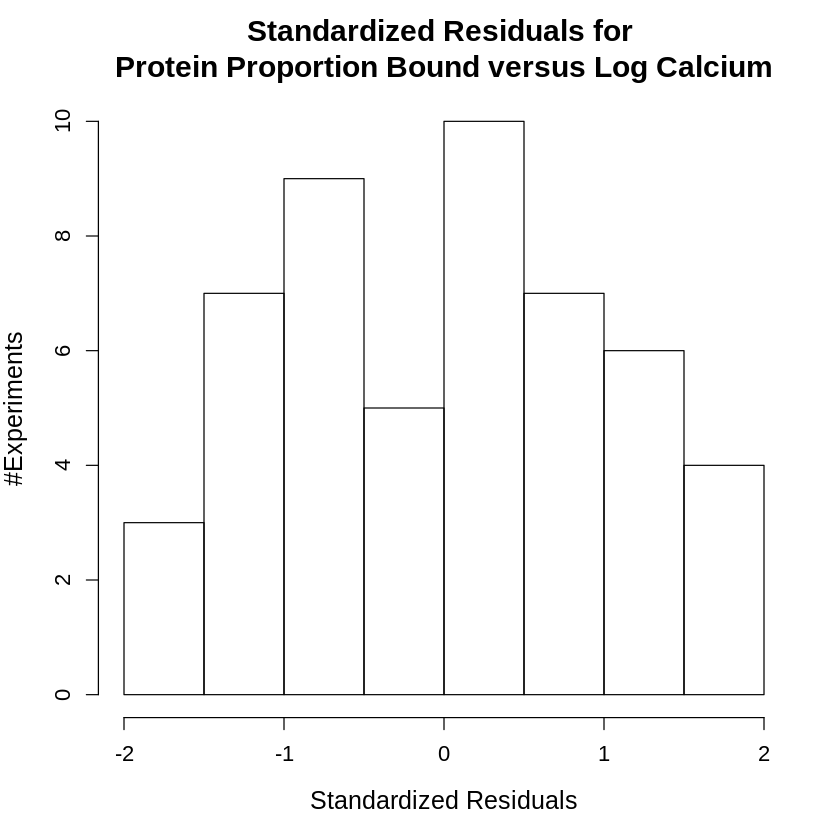

In [48]:
qqnorm(flu.rstand, ylab="Standardized residuals", xlab="Normal Scores", 
       main="Normal Probability Plot for 
Protein Proportion Bound versus Log Calcium", 
       cex.main = 1.5, 
       cex.axis = 1.1, cex.lab = 1.25)
qqline(flu.rstand)

hist(flu.rstand, main = "Standardized Residuals for 
Protein Proportion Bound versus Log Calcium", 
     xlab = "Standardized Residuals", 
     ylab = "#Experiments",  cex.main = 1.5, 
     cex.axis = 1.1, cex.lab = 1.25)

Transformation is need because linearity, constant variance and normality are not met

Transformation

In [49]:
flu.lm3 = lm(ProteinProp ~ Calcium + I(Calcium^2) + I(Calcium^3), data=df.flu)
summary(flu.lm3)


Call:
lm(formula = ProteinProp ~ Calcium + I(Calcium^2) + I(Calcium^3), 
    data = df.flu)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14031 -0.05528 -0.01859  0.05267  0.13583 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.523761   1.088885  -5.991 2.78e-07 ***
Calcium      -3.138442   0.442570  -7.091 5.94e-09 ***
I(Calcium^2) -0.411335   0.058399  -7.043 7.02e-09 ***
I(Calcium^3) -0.016515   0.002509  -6.583 3.51e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07099 on 47 degrees of freedom
Multiple R-squared:  0.9449,	Adjusted R-squared:  0.9414 
F-statistic: 268.8 on 3 and 47 DF,  p-value: < 2.2e-16


ProteinProp_hat = b0 + b1Calcium + b2Calcium^2 + b3Calcium^3


where b0 = -6.52, b1 = -3.14, b2 = -0.41, b3 = -0.017

reduced model = ProteinProp_hat = b0 + b1Calcium




Hypotheses:

H_null:b2=b3=0

H_alternative: bi =/= 0 for i = 2,3

In [50]:
anova(flu.lm, flu.lm3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
49,0.7040270,NA,NA,NA,NA
47,0.2368426,2,0.4671844,46.35499,7.611241e-12


Given an F-statistic of 46.35, the p-value from F(2, 47) is <0.0001. For any alpha-level, this gives strong evidence for rejecting the null hypothesis. Therefore, we conclude at least one of the variables (quadratic and/or cubic) in the subset explains additional variability in the ProteinProp beyond what is explained by the reduced model. 

Reduced Model: ProteinProp_hat = b0 + b1Calcium + b2Calcium^2




Hypotheses:

H_null:b3=0

H_alternative: bi =/= 0 for i = 3

In [51]:
flu.lm2 = lm(ProteinProp ~ Calcium + I(Calcium^2) , data=df.flu)
anova(flu.lm2, flu.lm3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
48,0.4552066,NA,NA,NA,NA
47,0.2368426,1,0.218364,43.33305,3.514368e-08


Given an F-statistic of 43.33, the p-value from F(1, 47) is <0.0001. For any alpha-level, this gives strong evidence for rejecting the null hypothesis. Therefore, we conclude the cubic variable explains additional variability in the ProteinProp beyond what is explained by the reduced model. 

In [52]:
summary(df.flu$Calcium)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-10.722  -9.014  -7.960  -7.873  -6.961  -4.814 

In [53]:
df.calcium = data.frame(Calcium = seq(-10.722, -4.814, by = 0.059))

In [59]:
df.new_ProteinProp = data.frame(ProteinProp = predict(flu.lm3, newdata = df.calcium))
simdata = cbind(df.calcium, df.new_ProteinProp)

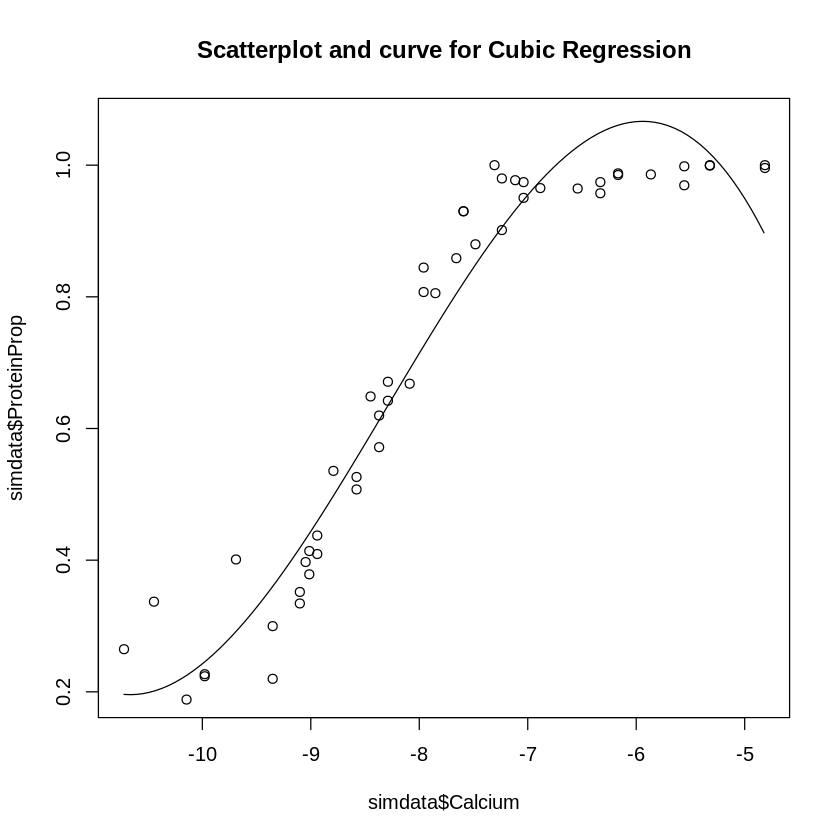

In [55]:
plot(simdata$Calcium, simdata$ProteinProp, type="l", 
     main = "Scatterplot and curve for Cubic Regression")
points(df.flu$Calcium, df.flu$ProteinProp)

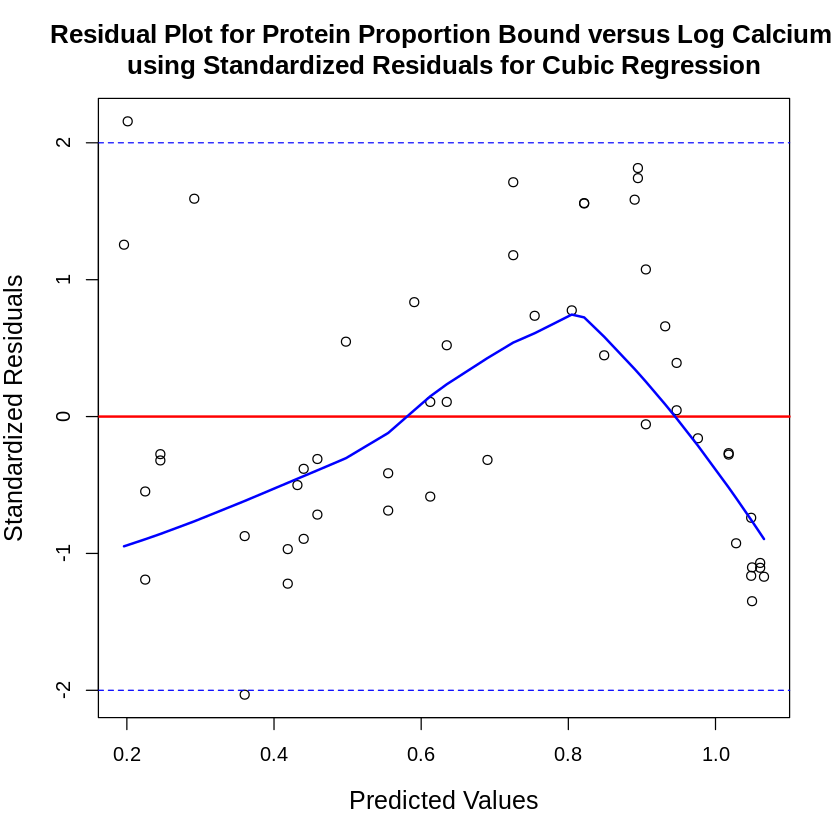

In [56]:
flu.rstand3=rstandard(flu.lm3) #obtain residuals
flu.pred3 = predict(flu.lm3)  #obtain predicted

plot(flu.pred3, flu.rstand3, 
     main="Residual Plot for Protein Proportion Bound versus Log Calcium 
using Standardized Residuals for Cubic Regression",
      xlab="Predicted Values", 
     ylab="Standardized Residuals", cex.main = 1.3,
     cex.lab = 1.25)
abline(h=0, col="red", lwd=2)
abline(h = 2 , col="blue", lty=2)
abline(h = -2, col="blue", lty=2)
lines(lowess(flu.pred3, flu.rstand3), col='blue', lwd=2)

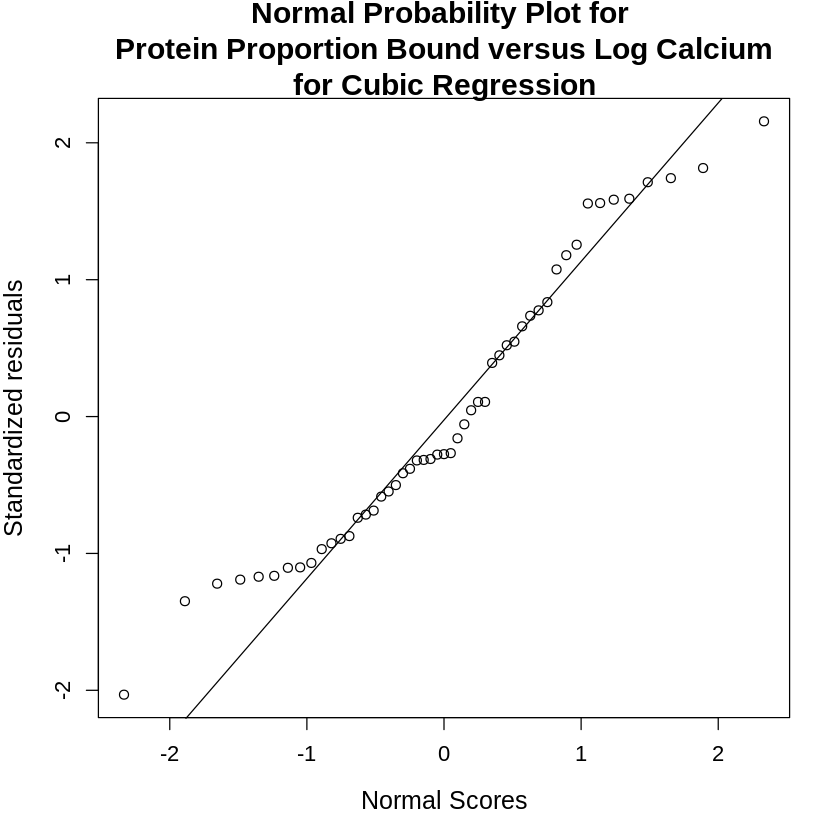

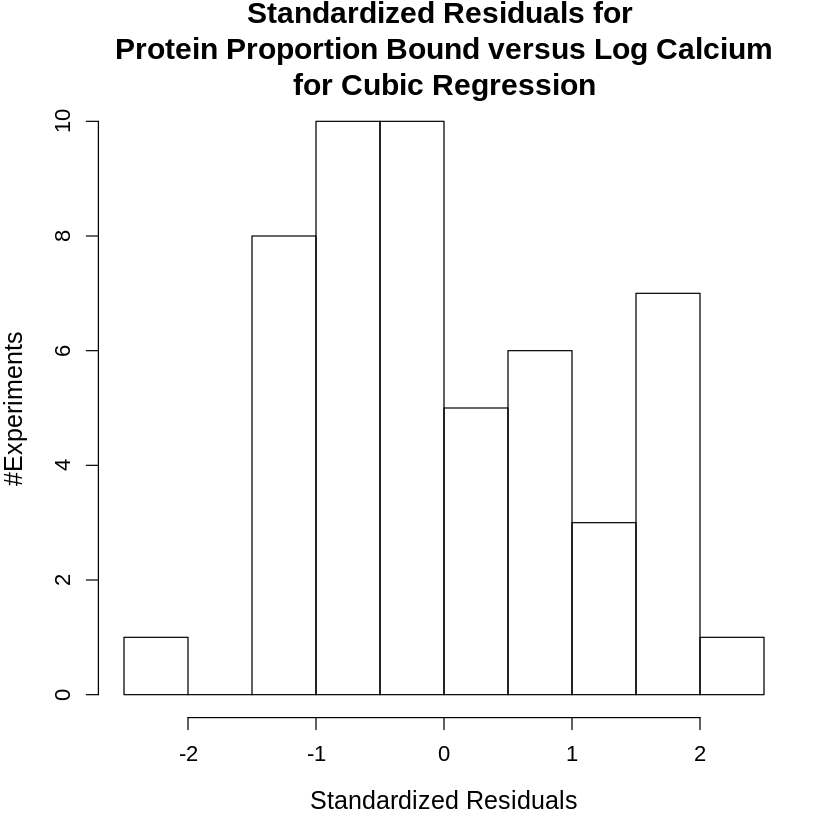

In [57]:
qqnorm(flu.rstand3, ylab="Standardized residuals", xlab="Normal Scores", 
       main="Normal Probability Plot for 
Protein Proportion Bound versus Log Calcium
for Cubic Regression", 
       cex.main = 1.5, 
       cex.axis = 1.1, cex.lab = 1.25)
qqline(flu.rstand3)

hist(flu.rstand3, main = "Standardized Residuals for 
Protein Proportion Bound versus Log Calcium
for Cubic Regression", 
     xlab = "Standardized Residuals", 
     ylab = "#Experiments",  cex.main = 1.5, 
     cex.axis = 1.1, cex.lab = 1.25)

Assumption of the linear regression model has improved but there are completely satisfactory

To compare R^2 score, we need the summary for flu.lm

In [58]:
summary(flu.lm)


Call:
lm(formula = ProteinProp ~ Calcium, data = df.flu)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22712 -0.09454  0.00176  0.10410  0.21375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.06586    0.08876   23.27   <2e-16 ***
Calcium      0.17514    0.01107   15.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1199 on 49 degrees of freedom
Multiple R-squared:  0.8363,	Adjusted R-squared:  0.8329 
F-statistic: 250.3 on 1 and 49 DF,  p-value: < 2.2e-16


From part b, we find that R^2 is 0.9449 and	adjusted R^2 is 0.9414 for the final (cubic regression) model. We see that the R^2 from the cubic model is greater than the R^2 from the SLR (0.9449 > 0.8363) so that means more variablity is explained by the cubic regression model than by the linear model. However, R^2 naturally increases with more predictors barring some exceptions like missing values so we have to look at ajusted R^2 which takes into account the number of predictors. We see that the adjusted R^2 from the cubic model is greater than the adjusted R^2 from the SLR (0.9414 > 0.8329) so that means, even accounting for the number of predictors, more variablity is explained by the cubic regression model than by the linear model. Therefore the final model is an improvement.